In [1]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
!cp /content/drive/MyDrive/Teeth_DataSet.zip /content/


In [ ]:
import zipfile

with zipfile.ZipFile('/content/Teeth_DataSet.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset')


In [ ]:
!ls /content/Dataset/Teeth_Dataset/Training/


In [2]:
import os
train_dir='/content/Dataset/Teeth_Dataset/Training'
class_names=os.listdir(train_dir)
val_dir='/content/Dataset/Teeth_Dataset/Validation'
class_names2=os.listdir(val_dir)


In [3]:
print(class_names)

['CoS', 'MC', 'OT', 'OLP', 'OC', 'Gum', 'CaS']


In [4]:
print(class_names2)

['CoS', 'MC', 'OT', 'OLP', 'OC', 'Gum', 'CaS']


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50


In [6]:
# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(train_dir):
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images

        print(train_dir+"/"+folder+"/"+img_name)

        img=image.load_img(train_dir+"/"+folder+"/"+img_name,target_size=(224,224))

        # Converting to arrary
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img)

        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array

/content/Dataset/Teeth_Dataset/Training/CoS/b_137_0_2436.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_89.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_124_0_5716.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_152_0_3889.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_153_0_3987.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_109.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_143_0_1755.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_150_0_1083.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_91_0_6351.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_81_0_7998.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_106_0_1536.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_130_0_5828.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_97_0_9327.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_79_0_674.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_112.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_129_0_8042.jpg
/content/Dataset/Teeth_Dataset/Training/CoS/b_105_0

In [7]:
x

[array([[[138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         [138.061  , 138.22101, 129.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        ...,
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         .

In [8]:
val_images=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir+"/"+folder+"/"+img_name,target_size=(224,224))

        # Converting to arrarys
        img=image.img_to_array(img)

        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(class_names2.index(folder))

In [9]:
val_images

[array([[[ 7.3060997e+01,  7.5221001e+01,  1.0132000e+02],
         [ 6.2060997e+01,  6.4221001e+01,  9.0320000e+01],
         [ 6.4060997e+01,  6.2221001e+01,  8.7320000e+01],
         ...,
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01],
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01],
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01]],
 
        [[ 7.2060997e+01,  7.4221001e+01,  1.0032000e+02],
         [ 6.4060997e+01,  6.6221001e+01,  9.2320000e+01],
         [ 6.5060997e+01,  6.3221001e+01,  8.8320000e+01],
         ...,
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01],
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01],
         [-1.8939003e+01, -5.7789993e+00,  2.3320000e+01]],
 
        [[ 6.9060997e+01,  7.1221001e+01,  9.7320000e+01],
         [ 6.8060997e+01,  7.0221001e+01,  9.6320000e+01],
         [ 6.6060997e+01,  6.4221001e+01,  8.9320000e+01],
         ...,
         [-2.0939003e+01, -7.7789993e+00,  2.1320000e+01],
        

In [10]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(3087, 224, 224, 3)
(3087, 7)
Validation Dataset
(1028, 224, 224, 3)
(1028, 7)


In [11]:
print("Summary of default ResNet50 model.\n")

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_resnet=resnet50.ResNet50(weights='imagenet')

# display the summary to see the properties of the model
model_resnet.summary()

Summary of default ResNet50 model.



Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:
target_size = (224, 224)
input_layer=layers.Input(shape=(224,224,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [13]:
from tensorflow.keras.preprocessing import image
import os

sample_image_path = '/content/Dataset/Teeth_Dataset/Validation/Gum/g_1201_0_517.jpg'  # change as needed

img = image.load_img(sample_image_path)
print("Image size:", img.size)  # (width, height)


Image size: (256, 256)


In [14]:
print("Summary of Custom ResNet50 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=resnet_model.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(256,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(7,activation='softmax')(dense1)

# Creating modle with input and output layer

model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom ResNet50 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,279,879 (187.99 MB)

 Trainable params: 49,226,759 (187.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
# Unfreeze last 30 layers
for layer in model.layers[-20:]:
    layer.trainable = True
model.summary()

We are making all the layers intrainable except the last layer. 



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,279,879 (187.99 MB)

 Trainable params: 33,573,383 (128.07 MB)

 Non-trainable params: 15,706,496 (59.92 MB)

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Save the best model during training
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Stop training early if no improvement in validation loss
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Put all callbacks into a list
callbacks = [checkpoint, early_stop, reduce_lr]


In [20]:
model.fit(xtrain,ytrain,epochs=50,batch_size=64,verbose=True,validation_data=(xtest,ytest),callbacks=callbacks)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4029 - loss: 19.7519
Epoch 1: val_loss improved from inf to 23.63241, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4068 - loss: 19.4815 - val_accuracy: 0.2508 - val_loss: 23.6324 - learning_rate: 0.0010
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9581 - loss: 0.1546
Epoch 2: val_loss improved from 23.63241 to 2.88593, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 27s 707ms/step - accuracy: 0.9584 - loss: 0.1539 - val_accuracy: 0.6812 - val_loss: 2.8859 - learning_rate: 0.0010
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9968 - loss: 0.0324
Epoch 3: val_loss improved from 2.88593 to 0.65883, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9968 - loss: 0.0324 - val_accuracy: 0.8204 - val_loss: 0.6588 - learning_rate: 0.0010
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9984 - loss: 0.0124
Epoch 4: val_loss improved from 0.65883 to 0.40202, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9984 - loss: 0.0124 - val_accuracy: 0.8706 - val_loss: 0.4020 - learning_rate: 0.0010
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 5: val_loss improved from 0.40202 to 0.35425, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.8851 - val_loss: 0.3543 - learning_rate: 0.0010
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 6: val_loss improved from 0.35425 to 0.34748, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8867 - val_loss: 0.3475 - learning_rate: 0.0010
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 7: val_loss improved from 0.34748 to 0.33403, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8900 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 8: val_loss did not improve from 0.33403
39/39 ━━━━━━━━━━━━━━━━━━━━ 35s 242ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8900 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 9: val_loss improved from 0.33403 to 0.32984, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8916 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 1.0000 - loss: 9.8231e-04
Epoch 10: val_loss did not improve from 0.32984
39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 244ms/step - accuracy: 1.0000 - loss: 9.8063e-04 - val_accuracy: 0.8932 - val_loss: 0.3300 - learning_rate: 0.0010
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 8.8799e-04
Epoch 11: val_loss improved from 0.32984 to 0.32568, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 1.0000 - loss: 8.8830e-04 - val_accuracy: 0.8900 - val_loss: 0.3257 - learning_rate: 0.0010
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 7.2121e-04
Epoch 12: val_loss improved from 0.32568 to 0.32508, saving model to best_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 1.0000 - loss: 7.2120e-04 - val_accuracy: 0.8948 - val_loss: 0.3251 - learning_rate: 0.0010
Epoch 13/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9993 - loss: 0.0021
Epoch 13: val_loss did not improve from 0.32508
39/39 ━━━━━━━━━━━━━━━━━━━━ 31s 271ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.8867 - val_loss: 0.3698 - learning_rate: 0.0010
Epoch 14/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9986 - loss: 0.0043
Epoch 14: val_loss did not improve from 0.32508
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.8819 - val_loss: 0.4351 - learning_rate: 0.0010
Epoch 15/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9955 - loss: 0.0230
Epoch 15: val_loss did not improve from 0.32508

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.9954 - loss: 0.0234 - val_accurac

In [22]:
model.evaluate(xtest, ytest)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.8959 - loss: 0.2803


[0.3197069764137268, 0.8883495330810547]

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [26]:
# Predict probabilities
y_pred_probs = model.predict(xtest)

# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(ytest, axis=1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step


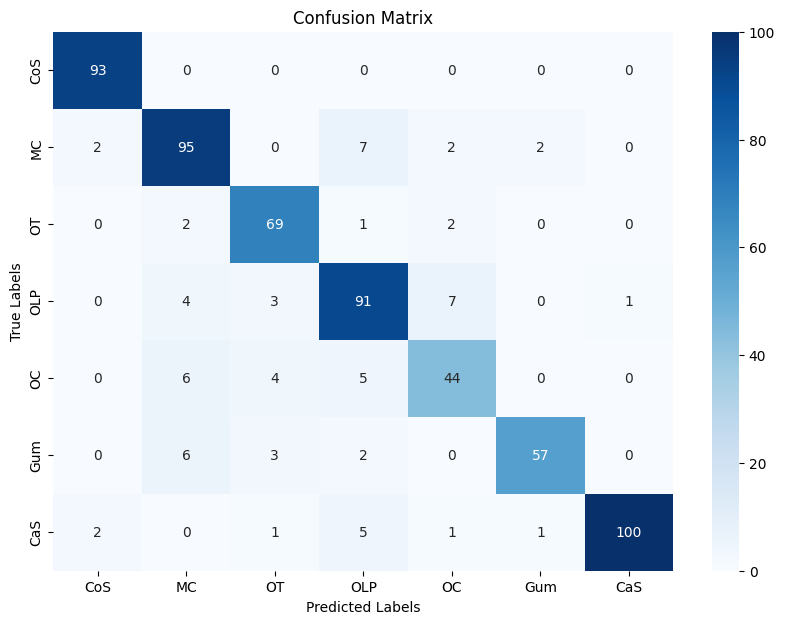

In [29]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report, f1_score

# If you haven’t already:
# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(model.predict(xtest), axis=1)
y_true = np.argmax(ytest, axis=1)

# Print detailed classification report (includes F1)
print(classification_report(y_true, y_pred, target_names=class_names))


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
              precision    recall  f1-score   support

         CoS       0.96      1.00      0.98        93
          MC       0.84      0.88      0.86       108
          OT       0.86      0.93      0.90        74
         OLP       0.82      0.86      0.84       106
          OC       0.79      0.75      0.77        59
         Gum       0.95      0.84      0.89        68
         CaS       0.99      0.91      0.95       110

    accuracy                           0.89       618
   macro avg       0.89      0.88      0.88       618
weighted avg       0.89      0.89      0.89       618

